### Import Libraries

In [1]:
import os
import numpy as np
from skimage import io
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
from utils.dirs import listdir_nohidden

### Get the image files and pair them

In [2]:
anomalous_dir = "data/Anomalous"
images = os.path.join(anomalous_dir, "images")
taggers = os.path.join(anomalous_dir, "gt")
image_list = listdir_nohidden(images)
dir_image_list = [os.path.join(images,x) for x in image_list]
corr_tag_list = listdir_nohidden(taggers)
dir_corr_tag_list = [os.path.join(taggers,x) for x in corr_tag_list]
image_tag_list = list(zip(dir_image_list, dir_corr_tag_list))
print(image_tag_list[:5])

[('data/Anomalous/images/ITIA1101.tif', 'data/Anomalous/gt/ITIA1101_gt.png'), ('data/Anomalous/images/ITIA1102.tif', 'data/Anomalous/gt/ITIA1102_gt.png'), ('data/Anomalous/images/ITIA1103.tif', 'data/Anomalous/gt/ITIA1103_gt.png'), ('data/Anomalous/images/ITIA1104.tif', 'data/Anomalous/gt/ITIA1104_gt.png'), ('data/Anomalous/images/ITIA1105.tif', 'data/Anomalous/gt/ITIA1105_gt.png')]


In [3]:
len(image_tag_list)


40

In [4]:
# Get one of the images
io.imread(image_tag_list[0][0]).shape

(696, 1024)

### Auxilary functions to show images

In [33]:
def show_images_from_files(image_tuple):
    for images in image_tuple:
        fig = plt.figure(figsize=(20, 10))
        ax1 = fig.add_subplot(1,2,1)
        ax1.imshow(io.imread(images[0]),cmap="gray")
        ax1 = fig.add_subplot(1,2,2)
        ax1.imshow(io.imread(images[1]),cmap="gray")
        
def show_images_from_memory(image_tuple):
    for images in image_tuple:
        fig = plt.figure(figsize=(20, 10))
        ax1 = fig.add_subplot(1,2,1)
        ax1.imshow((images[0]),cmap="gray")
        ax1 = fig.add_subplot(1,2,2)
        ax1.imshow((images[1]),cmap="gray")
def show_image_from_memory(image):
    
    """
    Args:
        image: io.imread object
    """
    plt.imshow(image, cmap="gray")
def show_image_from_file(image):
    """
    Args:
        image: io.imread object
    """
    plt.imshow(io.imread(image), cmap="gray")

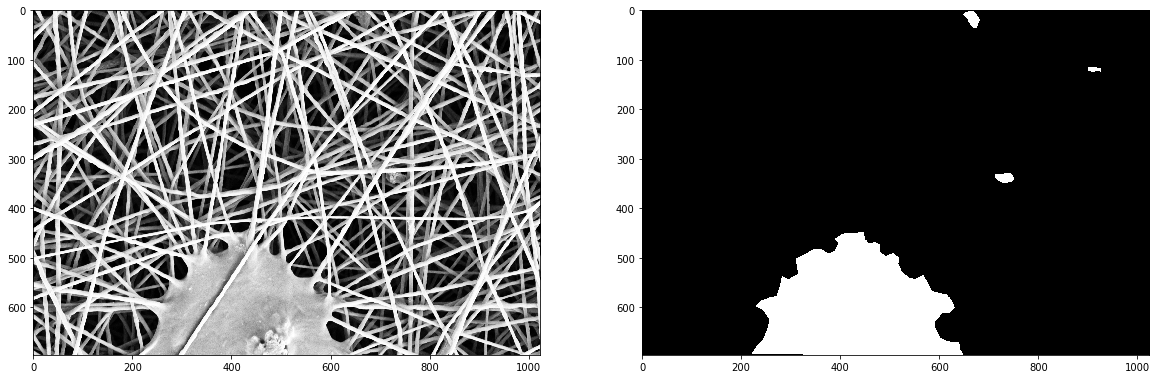

In [6]:
show_images_from_files(image_tag_list[:1])

### Random Patch Extraction for testing

In [7]:
np.random.seed(42)
def extract_patches(images,size,num_images):
    imgs = []
    for ind, img in enumerate(images):
        h, w = img.shape[:2]
        new_h, new_w = size, size
        for idx in range(num_images):
            top = np.random.randint(0, h - new_h)
            left = np.random.randint(0, w - new_w)
            image = img[top: top + new_h, left:left + new_w]
            imgs.append(image)
        print("{} images generated".format(num_images * (ind + 1)))
    return imgs

def add_color_red_2d(image,value):
    return np.array([[[min(value,255),s,s] for s in r] for r in image],dtype="u1")
def make_3_channel(image):
    return np.array([[[s,s,s] for s in r] for r in image],dtype="u1")
def make_3_channel_from_file(image):
    image = io.imread(image)
    return np.array([[[s,s,s] for s in r] for r in image],dtype="u1")

### Extract regions in a sequential order

In [8]:
def extract_regions(input_imgs,size):
    imgs_tags = []
    top = 0
    left = 0
    h, w = input_imgs[0].shape[:2]
    w_turns = w // size
    h_turns = h // size
    for adv_h in range(h_turns):
        for adv_w in range(w_turns):
            image = input_imgs[0][adv_h * size :(adv_h +1) * size , adv_w * size : (adv_w + 1 ) * size]
            tag = input_imgs[1][adv_h * size :(adv_h +1) * size , adv_w * size : (adv_w + 1 ) * size]
            imgs_tags.append((image,tag))
    return imgs_tags, (h_turns,w_turns)
        
def read_image_tuple(img):
    return (io.imread(img[0]),io.imread(img[1]))

('data/Anomalous/images/ITIA1101.tif', 'data/Anomalous/gt/ITIA1101_gt.png')


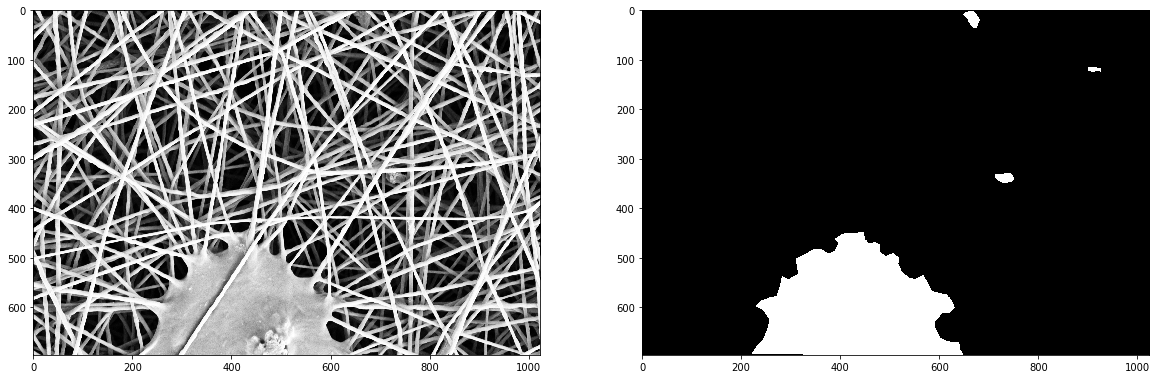

In [42]:
test = image_tag_list[0]
print(test)
show_images_from_files([test])

In [10]:
ext_img, turns = extract_regions(read_image_tuple(test),size=32)


### Print out and visualize the patch with anomaly

In [35]:
predictions = np.asarray(ext_img)
print(predictions.shape)

toto = predictions[0][0]
toto /= 255.
print(toto.shape)
tata = add_color_red_2d(toto,150)
tata.shape
io.imshow(tata)

(672, 2, 32, 32)


TypeError: ufunc 'true_divide' output (typecode 'd') could not be coerced to provided output parameter (typecode 'B') according to the casting rule ''same_kind''

In [13]:
predictions[0].shape

(2, 32, 32)

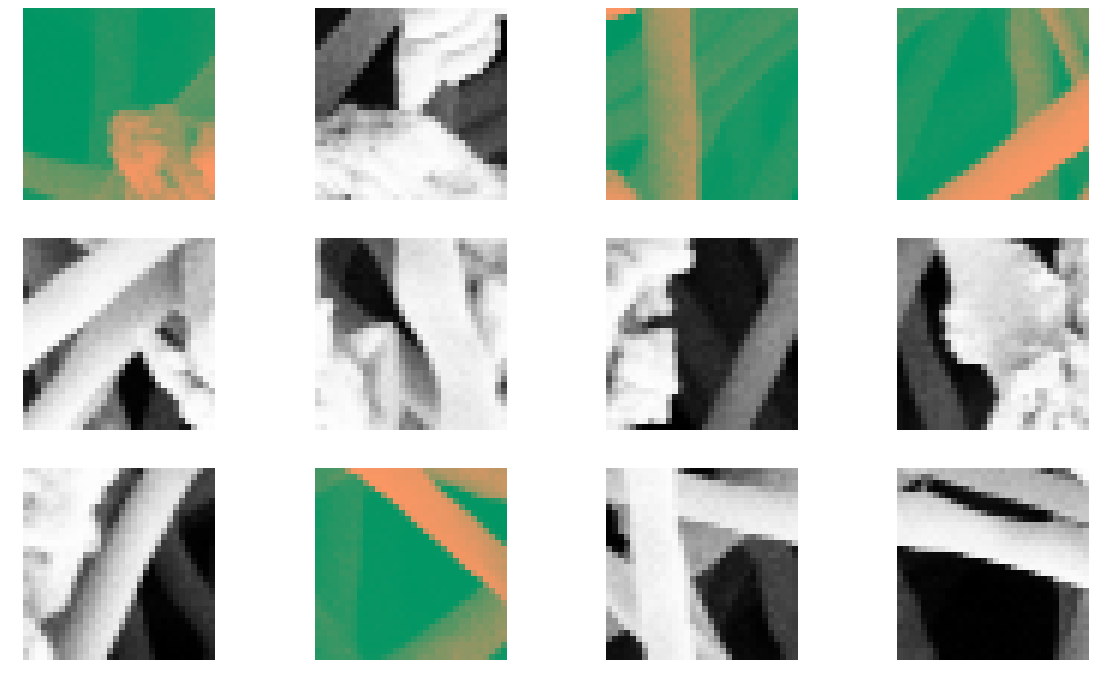

In [75]:
predictions = np.asarray(ext_img)
#predictions = np.expand_dims(predictions,axis=-1)
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(figsize=(20, 12))
    for i in range(12):
        plt.subplot(3, 4, i + 1)
        hoho = make_3_channel(predictions[i][0])
        if np.sum(hoho)< 300000:
            hoho[:,:,1] = 150
            hoho[:,:,2] = 100
        plt.imshow(hoho , cmap="gray")
        plt.axis("off")

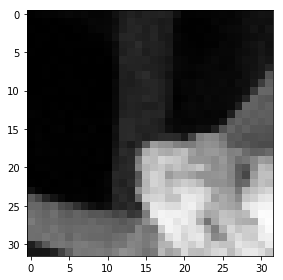

In [37]:
io.imshow(make_3_channel(predictions[0][0,:,:]))

In [14]:
for i in range(len(ext_img)):
    total = np.sum(ext_img[i][1])
    if total > 0:
        print("First patch that has anomly is {}".format(i))
        print(total)
        break

First patch that has anomly is 20
120615


In [41]:
ext_img[20][0]

array([[140, 140, 187, ...,   7,  13,  27],
       [126, 167, 210, ...,   6,   5,   7],
       [145, 201, 201, ...,   4,   4,   6],
       ...,
       [217, 193, 195, ..., 202, 206, 207],
       [234, 225, 227, ..., 210, 213, 218],
       [238, 232, 232, ..., 221, 214, 155]], dtype=uint8)

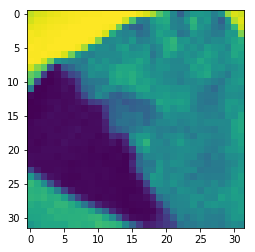

In [15]:
plt.imshow(ext_img[20][0],interpolation="nearest")

In [44]:
from scipy import ndimage

In [59]:
tee = tee/255

In [14]:
# Open the input image as numpy array, convert to greyscale and drop alpha
npImage=np.array(Image.fromarray(ext_img[6][0]).convert("L"))

# Get brightness range - i.e. darkest and lightest pixels
min=np.min(ext_img[6][0])        # result=144
max=np.max(ext_img[6][0])        # result=216

# Make a LUT (Look-Up Table) to translate image values
LUT=np.zeros(256,dtype=np.uint8)
LUT[min:max+1]=np.linspace(start=0,stop=255,num=(max-min)+1,endpoint=True,dtype=np.uint8)

# Apply LUT and save resulting image
Image.fromarray(LUT[a])

NameError: name 'a' is not defined

### Paints anomalies from the img, patch pairs

In [28]:
def paint_image_anomalies(image_tag_list,turns):
    imgs = []
    h_turns = 21
    w_turns = 32
    for image_tuple in image_tag_list:
        img, img_tag = read_image_tuple(image_tuple)
        image = make_3_channel(img)
        top = 0
        left = 0
        h, w = image.shape[:2]
        for adv_h in range(h_turns):
            for adv_w in range(w_turns):
                tag = img_tag[adv_h * 32 :(adv_h +1) * 32 , adv_w * 32 : (adv_w + 1 ) * 32]
                anomaly = np.sum(tag)
                if anomaly:
                    mask = np.array(tag==255)
                    image[adv_h * 32 :(adv_h +1) * 32 , adv_w * 32 : (adv_w + 1 ) * 32,0][mask] = 255
        imgs.append(image)
    return imgs

### Classic Painting method using full Masks

In [29]:
def paint_image_anomalies_full(image_tag_list,turns):
    imgs = []
    h_turns = turns[0]
    w_turns = turns[1]
    for image_tuple in image_tag_list:
        img, img_tag = read_image_tuple(image_tuple)
        image = make_3_channel(img)
        mask = np.array(img_tag==255)
        image[mask,0] = 255
        imgs.append(image)
    return imgs

In [30]:
hoho = paint_image_anomalies(image_tag_list[:3],turns)

In [31]:
def show_anomalies(patch_array):
        num_figs = len(patch_array)
        fig = plt.figure(figsize=(num_figs * 30,30))
        plt.tight_layout()
        for i in range(len(patch_array)):
            plt.subplot(num_figs,1, i+1)
            plt.imshow(patch_array[i])
            plt.axis('off')

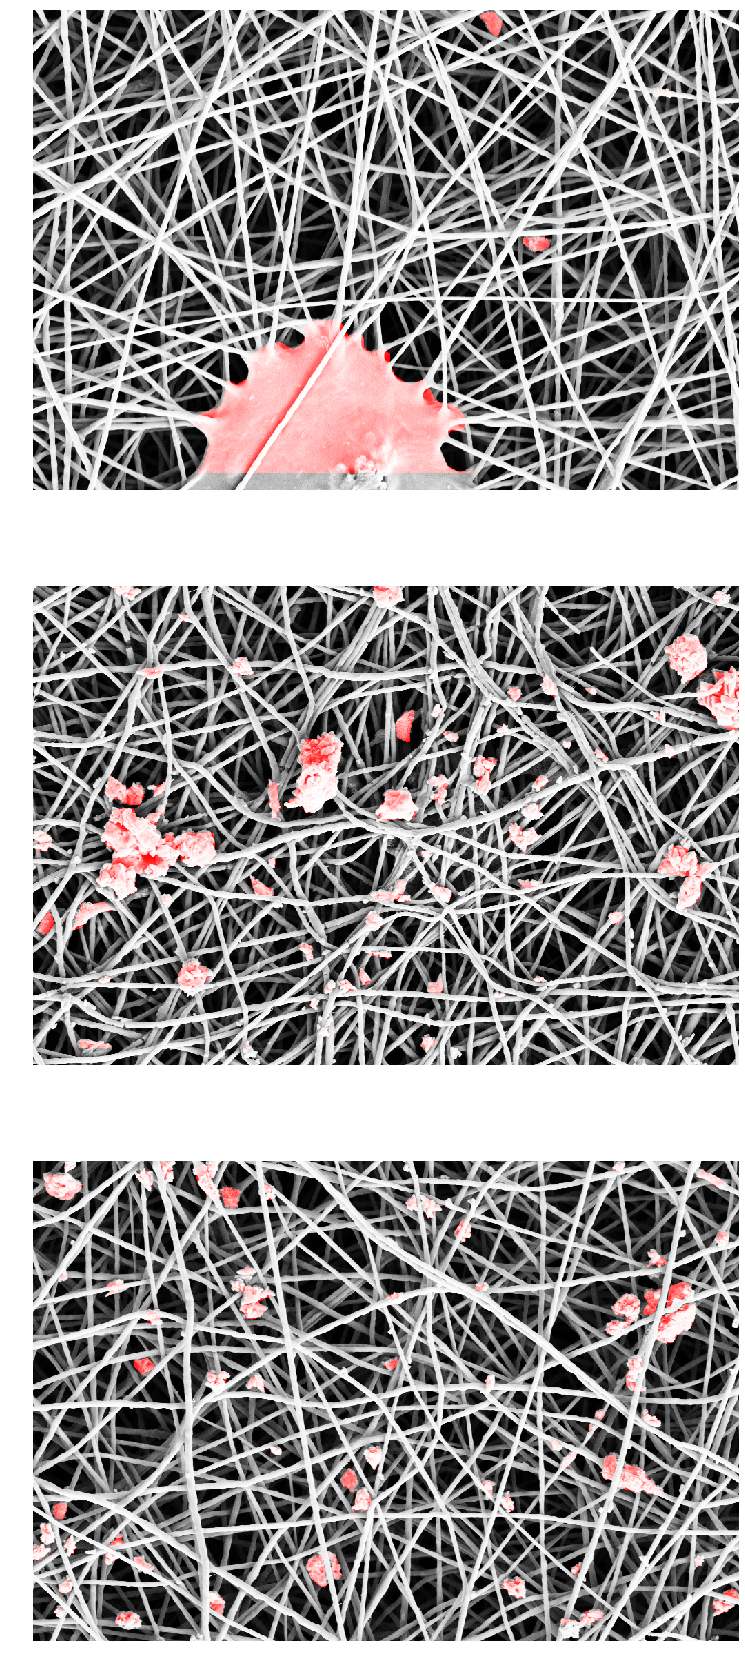

In [32]:
show_anomalies(hoho)

In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt
from skimage import io
from utils.DataLoader import DataLoader
from utils.config import process_config
config_file = 'configs/ganomaly.json'
config = process_config(config_file,"model_test")

#data = DataLoader(config)

In [2]:
from data_loader.data_generator import DataGenerator
data = DataGenerator(config)


2019-04-27 23:29:24,792 — utils.DataLoader — INFO — Train and Validations Datasets will be populated
2019-04-27 23:29:24,940 — utils.DataLoader — DEBUG — 10240 images generated
2019-04-27 23:29:25,090 — utils.DataLoader — DEBUG — 20480 images generated
2019-04-27 23:29:25,259 — utils.DataLoader — DEBUG — 30720 images generated
2019-04-27 23:29:25,411 — utils.DataLoader — DEBUG — 40960 images generated
2019-04-27 23:29:25,567 — utils.DataLoader — DEBUG — 51200 images generated
2019-04-27 23:29:49,252 — utils.DataLoader — INFO — Test Dataset will be populated
2019-04-27 23:30:16,275 — data_loader.data_generator — INFO — Data is loading...
2019-04-27 23:30:16,850 — utils.DataLoader — INFO — Train Dataset is Loaded
2019-04-27 23:30:17,040 — utils.DataLoader — INFO — Validation Dataset is Loaded


In [3]:
data.test_dataset

<BatchDataset shapes: ((?, 32, 32, ?), (?,)), types: (tf.float32, tf.int32)>

(28, 28, 1)


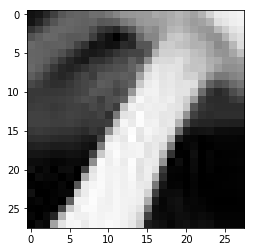

In [3]:
iterator = data.test_dataset.make_initializable_iterator()

img, tag = iterator.get_next()
init = tf.global_variables_initializer()

scores = []
with tf.Session() as sess:
    sess.run(init)
    sess.run(iterator.initializer)
    for _ in range(config.data_loader.num_iter_per_test):
        scores += sess.run(tag).tolist()
    a = sess.run(tf.image.random_contrast(img[0],lower=0.5,upper=0.9))
    print(a.shape)
    plt.imshow(a[:,:,0],cmap="gray")
    

34560

In [5]:
(len(scores) - (sum(scores))) / len(scores) * 100.

93.4056712962963

In [3]:
from utils.dirs import listdir_nohidden
listdir_nohidden("data/test/labels")

['label_0_0.jpg',
 'label_0_1.jpg',
 'label_0_10.jpg',
 'label_0_100.jpg',
 'label_0_101.jpg',
 'label_0_102.jpg',
 'label_0_103.jpg',
 'label_0_104.jpg',
 'label_0_105.jpg',
 'label_0_106.jpg',
 'label_0_107.jpg',
 'label_0_108.jpg',
 'label_0_109.jpg',
 'label_0_11.jpg',
 'label_0_110.jpg',
 'label_0_111.jpg',
 'label_0_112.jpg',
 'label_0_113.jpg',
 'label_0_114.jpg',
 'label_0_115.jpg',
 'label_0_116.jpg',
 'label_0_117.jpg',
 'label_0_118.jpg',
 'label_0_119.jpg',
 'label_0_12.jpg',
 'label_0_120.jpg',
 'label_0_121.jpg',
 'label_0_122.jpg',
 'label_0_123.jpg',
 'label_0_124.jpg',
 'label_0_125.jpg',
 'label_0_126.jpg',
 'label_0_127.jpg',
 'label_0_128.jpg',
 'label_0_129.jpg',
 'label_0_13.jpg',
 'label_0_130.jpg',
 'label_0_131.jpg',
 'label_0_132.jpg',
 'label_0_133.jpg',
 'label_0_134.jpg',
 'label_0_135.jpg',
 'label_0_136.jpg',
 'label_0_137.jpg',
 'label_0_138.jpg',
 'label_0_139.jpg',
 'label_0_14.jpg',
 'label_0_140.jpg',
 'label_0_141.jpg',
 'label_0_142.jpg',
 'label_0